# Introduction to Python for Scientists - Lesson 5


In [2]:
import random
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

## Last Exercise

In [3]:
stations = [f'Station {i}' for i in range(1, 4)]

stations

['Station 1', 'Station 2', 'Station 3']

In [4]:
random.seed(4)

stage_data = {}
first_day = datetime(2020, 1, 1)

for station in stations:

    print(f'Creating stage data for station {station}')

    # create a random series
    stages_list = [random.randint(50, 150)]
    for _ in range(364):
        stages_list.append(stages_list[-1] + random.randint(-2, 2))

    # create the stages dictionary with the dates and assign it to a specific station
    stage_data[station] = {first_day + timedelta(days=i): stage for i, stage in enumerate(stages_list)}



Creating stage data for station Station 1
Creating stage data for station Station 2
Creating stage data for station Station 3


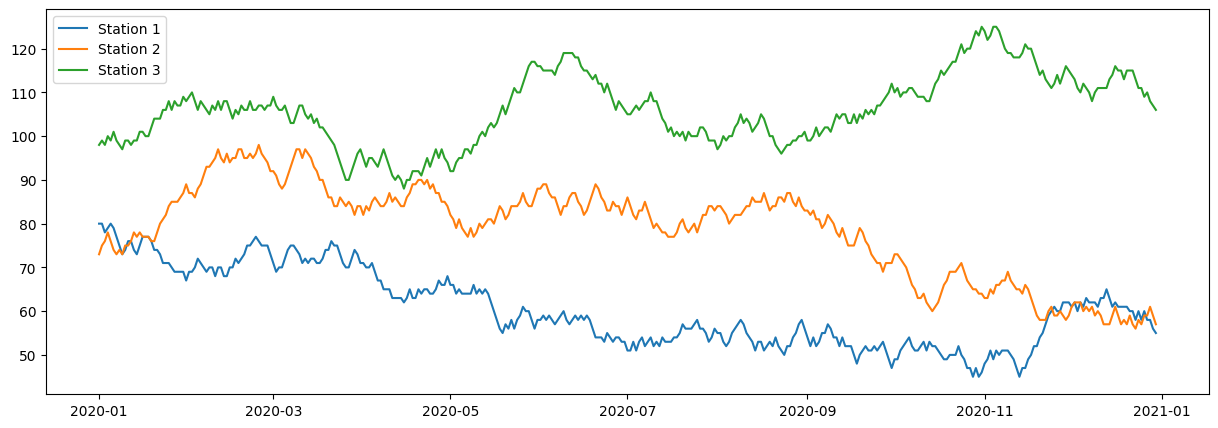

In [5]:
plt.figure(figsize=(15, 5))

for station in stations:
    plt.plot(list(stage_data[station].keys()), list(stage_data[station].values()), label=station)

plt.legend()

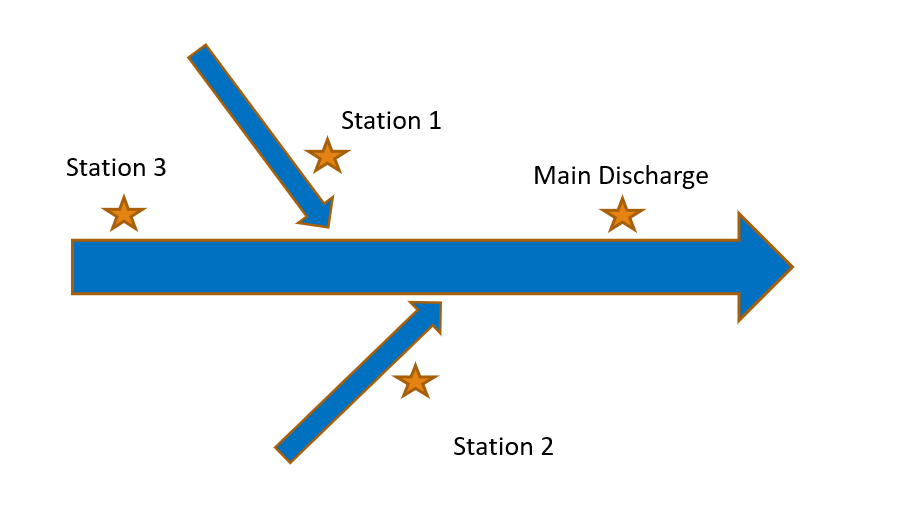

* The daily discharge on the main river?
* The mean discharge on the main river?
* The monthly mean discharge on the main river?
* The days of maximum and minimum discharge?

## Solution (brute-force)

In [6]:
# extract the dates
dates = stage_data['Station 1'].keys()
dates = list(dates)
dates[:3]

[datetime.datetime(2020, 1, 1, 0, 0),
 datetime.datetime(2020, 1, 2, 0, 0),
 datetime.datetime(2020, 1, 3, 0, 0)]

In [7]:
main_station = {}
for date in dates:
    q1 = stage_data['Station 1'][date]
    q2 = stage_data['Station 2'][date]
    q3 = stage_data['Station 3'][date]

    main_station[date]= q1 + q2 + q3

discharge_data = stage_data

discharge_data['Main Station'] = main_station

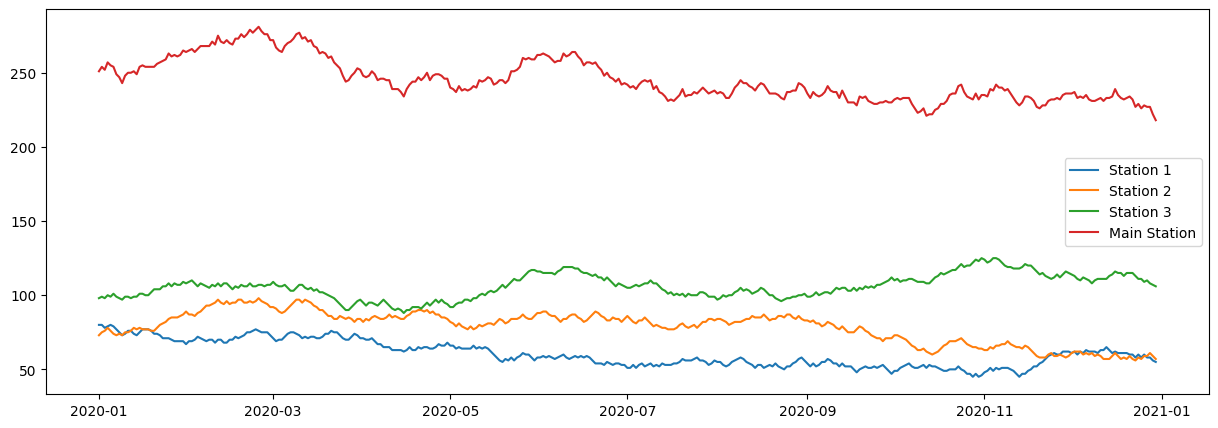

In [8]:
plt.figure(figsize=(15, 5))

for station in discharge_data.keys():
    plt.plot(list(discharge_data[station].keys()), list(discharge_data[station].values()), label=station)

plt.legend()

In [9]:
# Calculate the mean
total = 0
for date in dates:
    total += discharge_data['Main Station'][date]

mean = total / len(dates)
mean

245.11780821917807

In [10]:
# Monthly mean
# ?????

date.month

12

In [11]:
# create an empty dict
monthly_discharge = {}

# loop through each month 
for month in range(1, 13):
    monthly_total = 0

    # start a date counter (to count the numer of dates within that specific month)
    date_count = 0

    # loop through all the dates and check if it is the "correct" month
    for date in dates:

        if date.month == month:
            date_count += 1
            monthly_total += discharge_data['Main Station'][date]

    monthly_discharge[month] = monthly_total / date_count

monthly_discharge

{1: 254.93548387096774,
 2: 272.0689655172414,
 3: 262.7096774193548,
 4: 244.9,
 5: 246.74193548387098,
 6: 255.6,
 7: 237.8709677419355,
 8: 238.41935483870967,
 9: 233.13333333333333,
 10: 230.90322580645162,
 11: 233.66666666666666,
 12: 231.33333333333334}

## Pandas

In [12]:
import pandas as pd

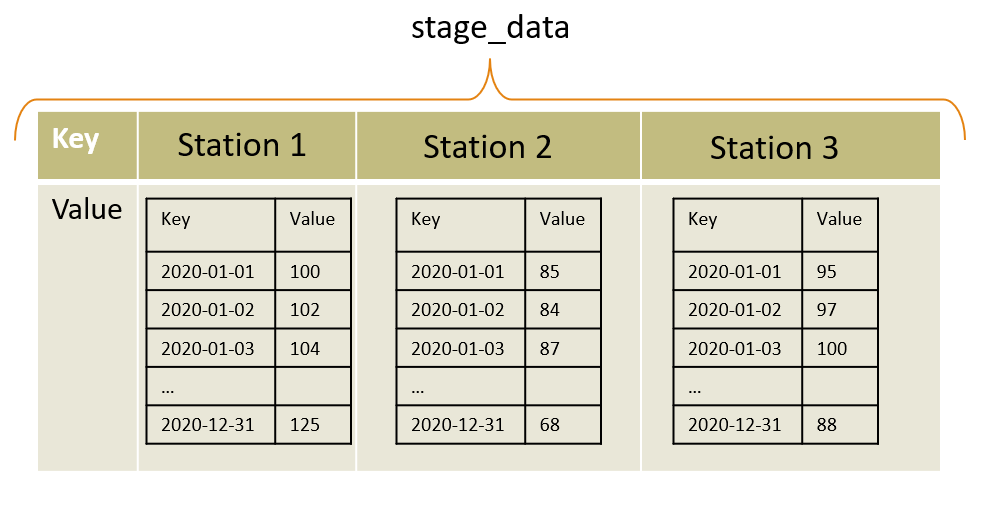

In [13]:
df = pd.DataFrame(discharge_data)

In [14]:
df

,Station 1,Station 2,Station 3,Main Station
2020-01-01,80,73,98,251
2020-01-02,80,75,99,254
2020-01-03,78,76,98,252
2020-01-04,79,78,100,257
2020-01-05,80,76,99,255
...,...,...,...,...
2020-12-26,60,59,109,228
2020-12-27,58,59,110,227
2020-12-28,58,61,108,227
2020-12-29,56,59,107,222


In [15]:
df['Total Discharge'] = df['Station 1'] + df['Station 2'] + df['Station 3']

df

,Station 1,Station 2,Station 3,Main Station,Total Discharge
2020-01-01,80,73,98,251,251
2020-01-02,80,75,99,254,254
2020-01-03,78,76,98,252,252
2020-01-04,79,78,100,257,257
2020-01-05,80,76,99,255,255
...,...,...,...,...,...
2020-12-26,60,59,109,228,228
2020-12-27,58,59,110,227,227
2020-12-28,58,61,108,227,227
2020-12-29,56,59,107,222,222


In [16]:
df.mean()

Station 1           60.424658
Station 2           78.687671
Station 3          106.005479
Main Station       245.117808
Total Discharge    245.117808
dtype: float64

In [17]:
df.groupby(by=df.index.month).mean()

,Station 1,Station 2,Station 3,Main Station,Total Discharge
1,74.290323,78.580645,102.064516,254.935484,254.935484
2,71.689655,93.620690,106.758621,272.068966,272.068966
3,72.354839,89.419355,100.935484,262.709677,262.709677
4,65.566667,86.133333,93.200000,244.900000,244.900000
5,61.064516,81.774194,103.903226,246.741935,246.741935
6,56.566667,85.266667,113.766667,255.600000,255.600000
7,54.032258,80.677419,103.161290,237.870968,237.870968
8,53.838710,84.129032,100.451613,238.419355,238.419355
9,52.200000,76.733333,104.200000,233.133333,233.133333
10,50.064516,66.419355,114.419355,230.903226,230.903226


# Introduction to Pandas

### Pandas Series

In [18]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [19]:
data[1:3]

1    0.50
2    0.75
dtype: float64

In [20]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [21]:
# it behaves like a dictionary (index/key: value)???
data['b']

0.5

In [22]:
# So, can I create a series from a dictionary? Let's check in the manual.
pd.Series?

In [23]:
station1 = pd.Series(discharge_data['Station 1'])

station1

2020-01-01    80
2020-01-02    80
2020-01-03    78
2020-01-04    79
2020-01-05    80
              ..
2020-12-26    60
2020-12-27    58
2020-12-28    58
2020-12-29    56
2020-12-30    55
Length: 365, dtype: int64

In [24]:
discharge_data['Station 1']

{datetime.datetime(2020, 1, 1, 0, 0): 80,
 datetime.datetime(2020, 1, 2, 0, 0): 80,
 datetime.datetime(2020, 1, 3, 0, 0): 78,
 datetime.datetime(2020, 1, 4, 0, 0): 79,
 datetime.datetime(2020, 1, 5, 0, 0): 80,
 datetime.datetime(2020, 1, 6, 0, 0): 79,
 datetime.datetime(2020, 1, 7, 0, 0): 77,
 datetime.datetime(2020, 1, 8, 0, 0): 75,
 datetime.datetime(2020, 1, 9, 0, 0): 73,
 datetime.datetime(2020, 1, 10, 0, 0): 74,
 datetime.datetime(2020, 1, 11, 0, 0): 76,
 datetime.datetime(2020, 1, 12, 0, 0): 76,
 datetime.datetime(2020, 1, 13, 0, 0): 74,
 datetime.datetime(2020, 1, 14, 0, 0): 73,
 datetime.datetime(2020, 1, 15, 0, 0): 75,
 datetime.datetime(2020, 1, 16, 0, 0): 77,
 datetime.datetime(2020, 1, 17, 0, 0): 77,
 datetime.datetime(2020, 1, 18, 0, 0): 77,
 datetime.datetime(2020, 1, 19, 0, 0): 76,
 datetime.datetime(2020, 1, 20, 0, 0): 74,
 datetime.datetime(2020, 1, 21, 0, 0): 74,
 datetime.datetime(2020, 1, 22, 0, 0): 73,
 datetime.datetime(2020, 1, 23, 0, 0): 71,
 datetime.datetime(2

In [25]:
# What are the difference? Pros / cons?

discharge_data['Station 1'][datetime(2020, 7, 8)]

53

In [26]:
station1[datetime(2020, 7, 8)]

53

In [27]:
station1

2020-01-01    80
2020-01-02    80
2020-01-03    78
2020-01-04    79
2020-01-05    80
              ..
2020-12-26    60
2020-12-27    58
2020-12-28    58
2020-12-29    56
2020-12-30    55
Length: 365, dtype: int64

In [28]:
station1['2020-07-08':'2020-07-15']

2020-07-08    53
2020-07-09    54
2020-07-10    52
2020-07-11    53
2020-07-12    52
2020-07-13    54
2020-07-14    53
2020-07-15    53
dtype: int64

<Axes: >

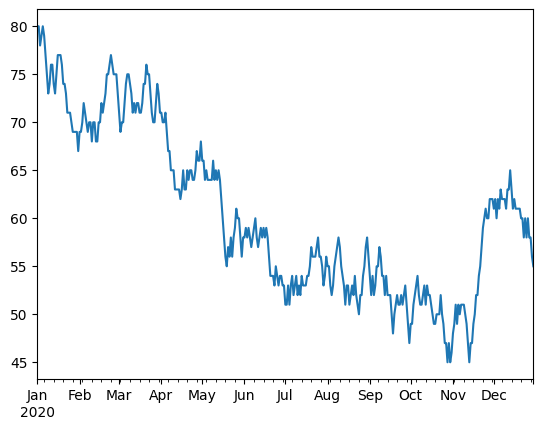

In [29]:
station1.plot()

In [30]:
# keys
station1.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-12-21', '2020-12-22', '2020-12-23', '2020-12-24',
               '2020-12-25', '2020-12-26', '2020-12-27', '2020-12-28',
               '2020-12-29', '2020-12-30'],
              dtype='datetime64[ns]', length=365, freq=None)

In [31]:
station1.values

array([80, 80, 78, 79, 80, 79, 77, 75, 73, 74, 76, 76, 74, 73, 75, 77, 77,
       77, 76, 74, 74, 73, 71, 71, 71, 70, 69, 69, 69, 69, 67, 69, 69, 70,
       72, 71, 70, 69, 70, 70, 68, 70, 70, 68, 68, 70, 70, 72, 71, 72, 73,
       75, 75, 76, 77, 76, 75, 75, 75, 73, 71, 69, 70, 70, 72, 74, 75, 75,
       74, 73, 71, 72, 71, 72, 72, 71, 71, 72, 74, 74, 76, 75, 75, 73, 71,
       70, 70, 72, 74, 73, 71, 71, 70, 70, 71, 69, 67, 67, 65, 65, 65, 63,
       63, 63, 63, 62, 63, 65, 63, 63, 65, 64, 65, 65, 64, 64, 65, 67, 66,
       66, 68, 66, 66, 64, 65, 64, 64, 64, 64, 66, 64, 65, 64, 65, 64, 62,
       60, 58, 56, 55, 57, 56, 58, 56, 58, 59, 61, 60, 60, 58, 56, 58, 58,
       59, 58, 59, 58, 57, 58, 59, 60, 58, 57, 58, 59, 58, 59, 58, 59, 58,
       56, 54, 54, 54, 53, 55, 54, 53, 54, 54, 53, 53, 51, 51, 53, 51, 53,
       54, 52, 53, 54, 52, 53, 52, 54, 53, 53, 53, 54, 54, 55, 57, 56, 56,
       56, 57, 58, 56, 56, 55, 53, 54, 56, 55, 55, 53, 52, 53, 55, 56, 57,
       58, 57, 55, 54, 53

In [32]:
station1.sum() # min, max, mean, std

22055

In [33]:
station2 = pd.Series(discharge_data['Station 2'])
station3 = pd.Series(discharge_data['Station 3'])

main_station = station1 + station2 + station3
main_station

2020-01-01    251
2020-01-02    254
2020-01-03    252
2020-01-04    257
2020-01-05    255
             ... 
2020-12-26    228
2020-12-27    227
2020-12-28    227
2020-12-29    222
2020-12-30    218
Length: 365, dtype: int64

<Axes: >

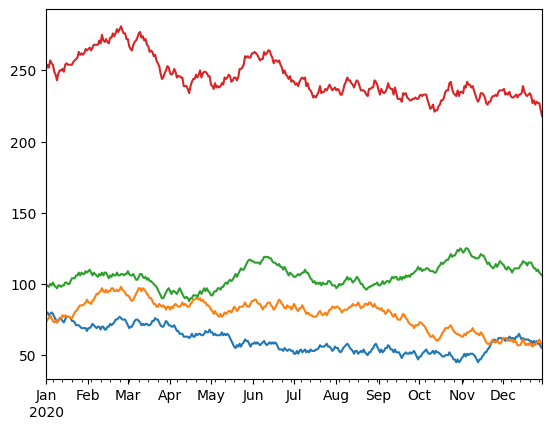

In [34]:
# NOTE: the sum is performed aligned by the index

station1.plot()
station2.plot()
station3.plot()
main_station.plot()

In [35]:
mean_discharge = main_station.mean()
mean_discharge

245.11780821917807

In [36]:
mean_discharge.plot()

AttributeError: ignored

In [37]:
# data = pd.Series([0.25, 0.5, 0.75, 1.0],
#                  index=['a', 'b', 'c', 'd'])

mean_discharge = pd.Series(mean_discharge, index=station1.index)

<Axes: >

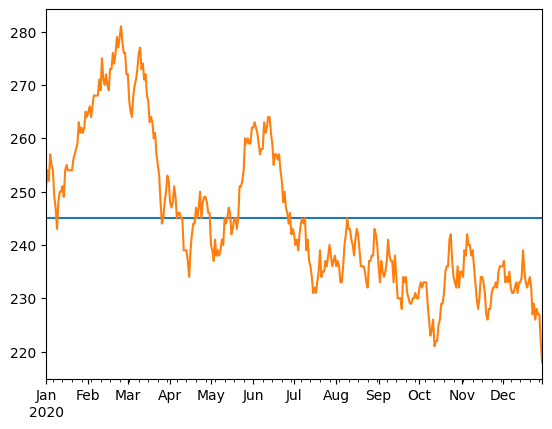

In [38]:
mean_discharge.plot()
main_station.plot()


* The daily discharge on the main river?
* The mean discharge on the main river?
* The monthly mean discharge on the main river?
* The days of maximum and minimum discharge?

In [39]:
main_station.max(), main_station.min()

(281, 218)

In [40]:
main_station[main_station == main_station.min()]

2020-12-30    218
dtype: int64

In [41]:
main_station[main_station == main_station.max()]


2020-02-25    281
dtype: int64

In [42]:
# positional indexing with iloc
main_station.iloc[3:5]

2020-01-04    257
2020-01-05    255
dtype: int64

In [43]:
main_station

2020-01-01    251
2020-01-02    254
2020-01-03    252
2020-01-04    257
2020-01-05    255
             ... 
2020-12-26    228
2020-12-27    227
2020-12-28    227
2020-12-29    222
2020-12-30    218
Length: 365, dtype: int64

In [45]:
main_station[3:5]

2020-01-04    257
2020-01-05    255
dtype: int64

In [50]:
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [51]:
data[[True, False, True, False]]

a    0.25
c    0.75
dtype: float64

In [52]:
# what is returned when we perform
data == 0.5

a    False
b     True
c    False
d    False
dtype: bool

In [53]:
data[data==0.5]

b    0.5
dtype: float64

In [54]:
main_station[main_station==222]

2020-10-13    222
2020-10-14    222
2020-12-29    222
dtype: int64